# Target Classification - metadata table

### Loading the JC dict
### Loading metadata-df GEO

#### Creating new columns containing our targets of interest and IC 

###### We parsed three columns (Target-antibody, title and source-cell)

In [1]:
#loading JF targets dict 


dict_target = {}

target = open('common.dict', 'r')

for i in target:
    i = i.strip()
    key,value = i.split(',')
    dict_target[key]=value

In [190]:
#checking target
# dict_target

In [2]:
#loading the metadata df final_df_to_work_42022samples.csv

import re
import pandas as pd
import numpy as np

df = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/Chip-Seq-GSMs-To-Work/final_df_to_work_42022samples.csv')


In [3]:
df.head()

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories,Categories_v2
0,H3K4me3_scChIPseq_Jurkat-Ramos,NaN,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290887,ChIP-Seq,NaN,NaN,Trait,Trait
1,H3K27me3_scChIPseq_Jurkat-Ramos,NaN,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290888,ChIP-Seq,NaN,NaN,Trait,Trait
2,h3k4me_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097929,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait,Trait
3,h3k4me3_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097930,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait,Trait
4,h3k27ac_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097931,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait,Trait


# Program 1

## For each dict.value - re.compile
## It is more slowly compared with the second program (7.2 s)

### But here we have the advantage of get the key name to put into a target-interest column



In [4]:
#program one - 7.5 seconds - too long

# %%timeit
counter = 0 
lista = []

for key, value in dict_target.items():
    regex = re.compile(value, re.IGNORECASE)
    for index, row in df.iloc[2000:3000].iterrows():
        if re.search(regex, row['Title']):
            #print("KEY:", key, "MATCH:", row['Title'])
#             lista.append(row['Title'])
            counter += 1
        
# slow_set = set(lista

# Program 2

## All values were compiled
### For each dataframe row - find some regex

### The program is too much faster than the first one (0.5 ms)
### BUT: the name of targets will be the value name

In [5]:
#creating a target compile (values dict)

all_regex = dict_target.values()

all_regex_str = "|".join(all_regex)

all_regex_compiled = re.compile(all_regex_str,re.IGNORECASE)

In [6]:
#First thing: we need to fill the nan fields with strings to program works well

#1) Fill nan by None 

df_filled = df.fillna('None')


#### Saving the FINAL df with filled NA by None

In [194]:

df_filled.to_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/Chip-Seq-GSMs-To-Work/final_df_to_work_42022samples-NaN-filled.csv', index = False)


In [7]:
#program 2

#Warning - sometimes we have a match (program 1) with more then one target per title. We need to find a way to verify
##this information if we will no have it in another column 
#here we are classifying the IC as well
#work with df_filled

# %%timeit

length = len(df_test.index)
#put the df_lengh for range
set_lista2 = list(range(length))

#put the df_lengh for range
IC = list(range(length))

for index, row in df_test.iterrows():
    match_source  = re.search(all_regex_compiled, row['source-cell'])
    match_title  = re.search(all_regex_compiled, row['Title'])
    match_target  = re.search(all_regex_compiled, row['Target-antibody'])
    
    
    if match_source:
        set_lista2[index] = match_source.group()
        IC[index] = 'third'
    
    if match_title:
        set_lista2[index] = match_title.group()
        IC[index] = 'second'
    
    if match_target:
        set_lista2[index] = match_target.group()
        IC[index] = 'first'
    
    else:
        set_lista2[index] = "None"
        IC[index] = 'None'
        
        
        



NameError: name 'df_test' is not defined

# Function Code








In [9]:
def target_IC(df):
    

    length = len(df.index)
    #put the df_lengh for range
    list_target = list(range(length))

    #put the df_lengh for range
    IC = list(range(length))

    for index, row in df.iterrows():
        match_source  = re.search(all_regex_compiled, row["source-cell"])
        match_title  = re.search(all_regex_compiled, row['Title'])
        match_target  = re.search(all_regex_compiled, row['Target-antibody'])


        if match_source:
            list_target[index] = match_source.group()
            IC[index] = 'third'

        if match_title:
            list_target[index] = match_title.group()
            IC[index] = 'second'

        if match_target:
            list_target[index] = match_target.group()
            IC[index] = 'first'
              

    return list_target, IC


list_target, IC = target_IC(df_filled)




In [247]:
print(list_target)


[0, 1, 2, 'H3K4me1', 'H3K4me3']


In [219]:
#Warnings 

#1) I've tried to replace the index by None using else, but the programn did not work well
#2) I've tried to store the column as col1, col2 and col3, but I get an error about string (in row[col1])

# Adding the new columns to df_filled

In [10]:
#new columns

df_filled['Target-interest'] = list_target
df_filled['IC-target'] = IC

In [11]:
#checking columns
df_filled

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories,Categories_v2,Target-interest,IC-target
0,H3K4me3_scChIPseq_Jurkat-Ramos,None,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290887,ChIP-Seq,None,None,Trait,Trait,H3K4me3_scChIPseq_Jurkat-Ramos,second
1,H3K27me3_scChIPseq_Jurkat-Ramos,None,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290888,ChIP-Seq,None,None,Trait,Trait,H3K27me3_scChIPseq_Jurkat-Ramos,second
2,h3k4me_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097929,ChIP-Seq,None,CHP-134 neuroblastoma cells,Trait,Trait,h3k4me_WON,second
3,h3k4me3_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097930,ChIP-Seq,None,CHP-134 neuroblastoma cells,Trait,Trait,h3k4me3_WON,second
4,h3k27ac_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097931,ChIP-Seq,None,CHP-134 neuroblastoma cells,Trait,Trait,h3k27ac,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42017,GATA1-A,None,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970258,ChIP-Seq,None,None,Trait,Trait,42017,42017
42018,PolII-F (HiSeq 2000),None,Homo sapiens,Human primary fetal proerythroblasts (ProEs),GSE36985,GSM970259,ChIP-Seq,None,None,Trait,Trait,PolII,second
42019,PolII-A (HiSeq 2000),None,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970260,ChIP-Seq,None,None,Trait,Trait,PolII,second
42020,IRF2-A,None,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970261,ChIP-Seq,None,None,Trait,Trait,42020,42020


In [12]:
#SAVING FINAL TABLE - CTRL - TARGETS -JF TARGET 


df_filled.to_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/Chip-Seq-GSMs-To-Work/final_df_to_work_42022samples-CTRL-TARGET-JF.csv', index = False)


# Exploring the data

In [439]:
#Using string contains to count our targets 

#h3k27ac, h3k27me3, h3k36me3, h3k4me1, h3k4me3, h3k9me3

#h3k4me3 - 2663
h3k4me3_df = df_filled[df_filled['Target-interest'].str.contains('h3k4me3', case=False, na=False)]
#h3k4me3_df


In [452]:
#h3k4me1 (for this target, we have h3k4me_ as well) - 1353

searchfor = ['h3k4me_', 'h3k4me1']

h3k4me1_df = df_filled[df_filled['Target-interest'].str.contains('|'.join(searchfor), case=False, na=False)]
#h3k4me1_df

In [436]:
#h3k27ac - 4552
h3k27ac_df = df_filled[df_filled['Target-interest'].str.contains('h3k27ac', case=False, na=False)]
#h3k27ac_df

In [351]:
#h3k27ac_df.nunique()

In [434]:
#31 terms related to h3k27ac (mix of targets for the same sample)
h3k27ac_target = h3k27ac_df['Target-interest'].tolist()
h3k27ac_target_set = set(h3k27ac_target)

#h3k27ac_target_set

In [422]:

#h3k27ac_df[h3k27ac_df['Target-interest'].str.contains('H3K4me3 D11, H3K27ac D', case=False, na=False)]
#H3K4me1_and_H3K27ac_ChIP-seq_GATA

In [440]:
#h3k27me3 - 1792
h3k27me3_df = df_filled[df_filled['Target-interest'].str.contains('h3k27me3', case=False, na=False)]
#h3k27me3_df

In [441]:
#h3k36me3 - 715
h3k36me3_df = df_filled[df_filled['Target-interest'].str.contains('h3k36me3', case=False, na=False)]
#h3k36me3_df

In [442]:
#h3k9me3 - 805
h3k9me3_df = df_filled[df_filled['Target-interest'].str.contains('h3k9me3', case=False, na=False)]
#h3k9me3_df 

# NGS-QC no dup - 22360

In [334]:
# NGS-QC table - 22360

df_ngs = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/JF_Frosi_Code_NGS-QC/NGS_HS_ChipSeq_nodup.csv')


In [336]:
#df_ngs

In [364]:
#looking for targets - Ok
#df_ngs[df_ngs['Target molecule'].str.contains('h3k9me3', case=False, na=False)]

# Quantitative Targets table  - NGS and GEO

In [372]:

table = {'Target': ['H3K4me3', 'H3K4me1', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K9me3'],
         'GEO-NCBI': [2663, 1353, 4552, 1792, 715, 805],
         'NGS-QC': [1897, 1003, 1949, 1183, 560, 498]
         
    }

ngs_geo_quant = pd.DataFrame(data=table)

In [373]:
ngs_geo_quant

,Target,GEO-NCBI,NGS-QC
0,H3K4me3,2663,1897
1,H3K4me1,1353,1003
2,H3K27ac,4552,1949
3,H3K27me3,1792,1183
4,H3K36me3,715,560
5,H3K9me3,805,498


In [399]:
#quantities of first, second and third (IC column)

#h3k9me3_df[h3k9me3_df['IC-target'].str.contains('second', case=False, na=False)]



Ic_target = {'Target': ['H3K4me3', 'H3K4me1', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K9me3'],
         'First-CI': [669, 346, 1119, 400, 258, 261],
         'Second-CI': [1992, 1007, 3433, 1384, 457, 544],
         'Third-CI': [2, 0, 0, 8, 0, 0]
         
    }

IC = pd.DataFrame(data=Ic_target)

In [400]:
IC

,Target,First-CI,Second-CI,Third-CI
0,H3K4me3,669,1992,2
1,H3K4me1,346,1007,0
2,H3K27ac,1119,3433,0
3,H3K27me3,400,1384,8
4,H3K36me3,258,457,0
5,H3K9me3,261,544,0


In [421]:
#list comphreension

# a = [ "none" for x in range(10)]
# a

# Checking if all target-interest samples from NGS-QC are included in GEO metadata

In [427]:


#list of targets

targets_list = ['h3k27ac', 'h3k27me3', 'h3k36me3', 'h3k4me1', 'h3k4me3', 'h3k9me3', 'h3k4me_']

ngs_tgt = df_ngs[df_ngs['Target molecule'].str.contains('|'.join(targets_list), case=False, na=False)]

geo_tgt = df_filled[df_filled['Target-interest'].str.contains('|'.join(targets_list), case=False, na=False)]

In [463]:
#ngs_tgt

In [464]:
#geo_tgt

In [451]:
#Why???
#2663+1353+4552+1792+715+805

In [450]:
#NGS- corret
#1897+1003+1949+1183+560+498

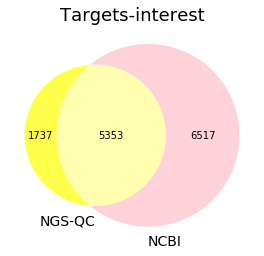

<Figure size 576x432 with 0 Axes>

In [449]:
#Venn diagram - all targets of interest
from matplotlib_venn import venn2
import matplotlib.pyplot as plt 
import seaborn as sns

#checking the intersection

list_ngs= ngs_tgt['Public ID'].tolist() 
list_NCBI = geo_tgt['GSM'].tolist()


set_ngs = set(list_ngs)
set_NCBI = set(list_NCBI)

# print(len(set_ngs_gsm_chip))
# print(len(set_NCBI_gsm_chip))

venn_tgt = venn2([set_ngs, set_NCBI], set_labels = ('NGS-QC', 'NCBI'), 
                                        set_colors=('yellow', 'pink'), alpha = 0.7)


for text in venn_tgt.set_labels:
    text.set_fontsize(14)
# for text in venn_gsm_ngs_geodb_NCBI_chip.subset_labels:
#     text.set_fontsize(12)


plt.title('Targets-interest', fontsize=18)
plt.figure(figsize=(8,6))


plt.show()






In [468]:
#lists dfs ngs and geo

list_df_ngs = ['h3k4me3_ngs','h3k4me1_ngs','h3k27ac_ngs', 'h3k27me3_ngs', 'h3k36me3_ngs', 'h3k9me3_ngs']
list_df_geo = ['h3k4me3_df','h3k4me1_df','h3k27ac_df', 'h3k27me3_df', 'h3k36me3_df', 'h3k9me3_df']



In [469]:

def create_df(string):


    return df_ngs[df_ngs['Target molecule'].str.contains(string, case=False, na=False)]

h3k27ac_ngs = create_df('h3k27ac')
h3k27me3_ngs = create_df('h3k27me3')
h3k36me3_ngs = create_df('h3k36me3')
h3k4me1_ngs = create_df('h3k4me1')
h3k4me3_ngs = create_df('h3k4me3')
h3k9me3_ngs = create_df('h3k9me3')


In [466]:
#Venn diagram - targets of interest

#checking the intersection


def do_venn(df1, df2, string):
    list_ngs= df1['Public ID'].tolist() 
    list_NCBI = df2['GSM'].tolist()


    set_ngs = set(list_ngs)
    set_NCBI = set(list_NCBI)

    venn_tgt = venn2([set_ngs, set_NCBI], set_labels = ('NGS-QC', 'NCBI'), 
                                            set_colors=('orange', 'red'), alpha = 0.7)

    for text in venn_tgt.set_labels:
        text.set_fontsize(14)

    plt.title(string, fontsize=18)
    plt.figure(figsize=(8,6))


    plt.show()

    


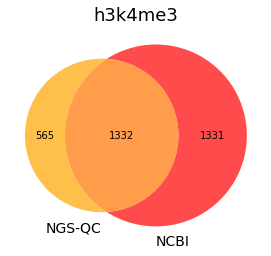

<Figure size 576x432 with 0 Axes>

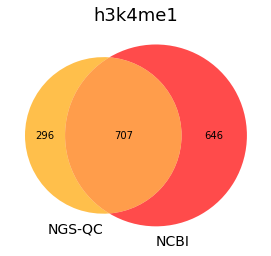

<Figure size 576x432 with 0 Axes>

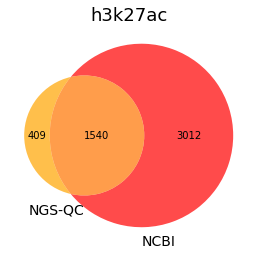

<Figure size 576x432 with 0 Axes>

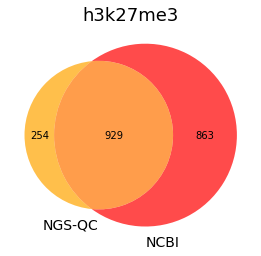

<Figure size 576x432 with 0 Axes>

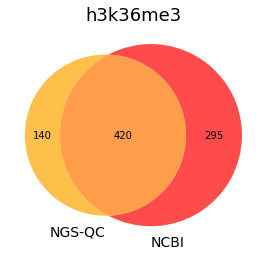

<Figure size 576x432 with 0 Axes>

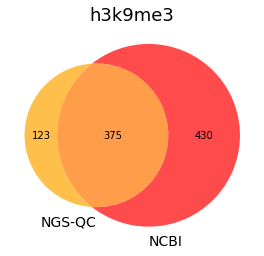

<Figure size 576x432 with 0 Axes>

In [470]:
#venns
do_venn(h3k4me3_ngs, h3k4me3_df, 'h3k4me3')
do_venn(h3k4me1_ngs, h3k4me1_df, 'h3k4me1')
do_venn(h3k27ac_ngs, h3k27ac_df, 'h3k27ac')
do_venn(h3k27me3_ngs, h3k27me3_df, 'h3k27me3')
do_venn(h3k36me3_ngs, h3k36me3_df, 'h3k36me3')
do_venn(h3k9me3_ngs, h3k9me3_df, 'h3k9me3')


In [476]:
#Getting the 43 GSE-control unique list and check manually 

list_ngs_1= h3k4me3_ngs['Public ID'].tolist() 
list_NCBI_1 = h3k4me3_df['GSM'].tolist()


set_ngs_1 = set(list_ngs_1)
set_NCBI_1 = set(list_NCBI_1)


h3 = set_ngs_1.difference(set_NCBI_1)
h3_list = list(h3)
print(len(h3_list))

565


In [471]:
#code

#See how to create a list with these dfs from ngs and geo
#then, pass these lists to venn function

In [477]:
#list to check the reasons

h3_list

['GSM1252306',
 'GSM916014',
 'GSM537643',
 'GSM621458',
 'GSM1960248',
 'GSM922787',
 'GSM1717082',
 'GSM772746',
 'GSM1969606',
 'GSM1969626',
 'GSM1969614',
 'GSM1599153',
 'GSM2760295',
 'GSM1550831',
 'GSM1550922',
 'GSM2069574',
 'GSM1464992',
 'GSM1129354',
 'GSM617271',
 'GSM772967',
 'GSM1415874',
 'GSM997221',
 'GSM1550861',
 'GSM2644055',
 'GSM1038455',
 'GSM1216738',
 'GSM847243',
 'GSM486711',
 'GSM2048289',
 'GSM1599149',
 'GSM1550798',
 'GSM621662',
 'GSM586869',
 'GSM529962',
 'GSM1550840',
 'GSM1853822',
 'GSM529959',
 'GSM537671',
 'GSM1673972',
 'GSM1338273',
 'GSM1624508',
 'GSM897560',
 'GSM2760298',
 'GSM1338287',
 'GSM956687',
 'GSM2825178',
 'GSM1465000',
 'GSM1483897',
 'GSM997232',
 'GSM772817',
 'GSM942085',
 'GSM670034',
 'GSM648493',
 'GSM772887',
 'GSM1825766',
 'GSM1960247',
 'GSM1550874',
 'GSM1653247',
 'GSM621637',
 'GSM772925',
 'GSM942073',
 'GSM317597',
 'GSM942086',
 'GSM1969594',
 'GSM1550996',
 'GSM1624509',
 'GSM621643',
 'GSM1550880',
 'GSM7148

In [498]:




#ERROR NGS-QC - this samples was classified as h3k4me3, but it is H3K9me2
h3k4me3_ngs[h3k4me3_ngs['Public ID'].str.contains('GSM942082', case=False, na=False)]


#GSM1252306 - missed
#GSM2069570 -  GSE78206 H3K4me3 ChIP in multiple myeloma MM1S cells in the presence and absence of KDM5-C70 (missed-8)

#GSM916014 - GSE17312 BI Human Reference Epigenome Mapping Project (633 samples; we have 270)
#Why? The sample above has no SRR file, we did not included this kind of samples

#GSM537643 - GSE19465 BI Human Reference Epigenome Mapping Project: ChIP-Seq in human subject (358; we have 176)
#Why? Same case above - no SRR file for this sample

#GSM1563747 - It has DRR instead SRR (we not included this samples )

#df_filled[df_filled['GSM'].str.contains('GSM942082', case=False, na=False)]

,Public ID,Study ID,PMID,Organism,Data type,Target molecule,TMRs,QC Stamps,QC Reports,Local QC Indicators,2.5 pcdenQC,2.5 pcQCsim,5 pcdenQC,5 pcQCsim,10 pcdenQC,10 pcQCsim,Seq Plataform,Submission Date
9741,GSM942082,"GSE38442, GSE38448",22795131,Homo sapiens,ChIP-seq,H3K4me3,53953273 (86.05),CBB,NaN,NaN,0.229,24.725,1.358,7.476,6.754,2.263,Illumina Genome Analyzer IIx,2012-06-04


In [485]:
#trying the old df

df_chipseq_parsed = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/Chip-Seq-GSMs-To-Work/Chip-seq-parsed-complete_towork.csv')

In [490]:
#checking in the old df (43k)

gsm_noSRR = ['GSM916014', 'GSM537643']
df_chipseq_parsed[df_chipseq_parsed['GSM'].str.contains('|'.join(gsm_noSRR), case=False, na=False)]


,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line
25705,ChIP-Seq analysis of H3K4me3 in human Duodenum...,NaN,Homo sapiens,Smooth muscle from wall of duodenum obtained d...,GSE17312,GSM916014,ChIP-Seq,NaN,NaN
26691,ChIP-Seq analysis of H3K4me3 in human pancreat...,NaN,Homo sapiens,pancreatic islets from a normal donor; 30J03AA...,GSE19465,GSM537643,ChIP-Seq,NaN,NaN
